https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-mar20-RemyaSNR/upload/master

#          Thera Bank Personal Loan Campaign 

Data Description: The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.


Context: This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget. 



Attribute Information:  

ID: Customer ID                  
Age: Customer's age in completed years                        
Experience: #years of professional experience          
Income: Annual income of the customer                        
ZIP Code: Home Address ZIP code.                         
Family: Family size of the customer                             
CCAvg: Avg. spending on credit cards per month                               
Education: Education Level. 1: Undergrad; 2: Graduate; 3:  Advanced/Professional       
Mortgage: Value of house mortgage if any. ($000)                     
Personal Loan: Did this customer accept the personal loan offered in the last campaign?               
Securities Account: Does the customer have a securities account with the bank?                           
CD Account: Does the customer have a certificate of deposit (CD) account with the bank?                        
Online: Does the customer use internet banking facilities?                    
Credit card: Does the customer use a credit card issued by the bank?

Learning Outcomes:  

Exploratory Data Analysis           
Preparing the data to train a model          
Training and making predictions using a classification model           
Model evaluation 
 
Objective: The classification goal is to predict the likelihood of a liability customer buying personal loans. 
 
Steps and tasks:       

1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks) 
2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)        
Number of unique in each column?         
Number of people with zero mortgage?          
Number of people with zero credit card spending per month?          
Value counts of all categorical columns.           
Univariate and Bivariate         
Get data model ready 
 
3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks) 
 
4. Use Logistic Regression model to predict the number of a customers buying personal loans. Print all the metrics related for evaluating the model performance (15 marks) 
 
5. Give your reasoning on how can the model perform better? (10 marks) Hint: Check parameter 
 
6. Give Business understanding of your model? (5 marks)

In [86]:
#Importing all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True) #---------------adds hue to the color
from IPython.display import display

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import train_test_split
from sklearn import metrics

import os,sys
from scipy import stats

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import warnings
warnings.filterwarnings('ignore')

In [87]:
pdata = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [88]:
pdata.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [89]:
display(pdata.shape)
display(pdata.size)

(5000, 14)

70000

In [90]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


The datatypes show no abnormalities/incorrect amputations 
However negative values can be found out from descriptive statistics only.

In [91]:
pdata.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


1. From above statistics, we can find the Experience column has negative values.  So these needs to be treated.
2. Also Mortgage column, we can see more records are in the zero range.

In [92]:
#Checking the Experience column:

display((pdata['Experience']<0).sum())
display(pdata[pdata['Experience']<0].shape)
pdata[pdata['Experience']<0]

52

(52, 14)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


Indicates, the Experience column has incorrect imputations of negative values (52 records).  So these needs to be treated

In [93]:
#Finding what would be the ideal value to replace the negative values. So, checking groupby age and experience

display(pdata[pdata['Experience']<0]['Age'])
pdata[pdata['Experience']<0]['Age'].value_counts()

89      25
226     24
315     24
451     28
524     24
536     25
540     25
576     25
583     24
597     24
649     25
670     23
686     24
793     24
889     24
909     23
1173    24
1428    25
1522    25
1905    25
2102    25
2430    23
2466    24
2545    25
2618    23
2717    23
2848    24
2876    24
2962    23
2980    25
3076    29
3130    23
3157    23
3279    26
3284    25
3292    25
3394    25
3425    23
3626    24
3796    24
3824    23
3887    24
3946    25
4015    25
4088    29
4116    24
4285    23
4411    23
4481    25
4514    24
4582    25
4957    29
Name: Age, dtype: int64

25    18
24    17
23    12
29     3
28     1
26     1
Name: Age, dtype: int64

The output indicates those records with negative experience are in their 20's age.  So replacing the negatives with median won't make sense (as median is 20). Hence, we would go ahead replacing the negative Experience with zero value.

In [94]:
#Replacing negatives with zero
pdata.loc[pdata.Experience<0,'Experience'] = 0
display(pdata[pdata['Experience']<0].shape)

pdata[pdata['ID']==2619] # just confirming whether one record with negatvie Experience is changed or not

(0, 14)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
2618,2619,23,0,55,92704,3,2.4,2,145,0,0,0,1,0


In [95]:
#Again getting the descriptive statistics to check the Experience column and others
pdata.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.119600,11.440484,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Now Experience column is found to have no negative values.  Thus, we corrected the incorrect imputations

In [96]:
#Checking Skewness of the variables:
pdata.skew()

ID                     0.000000
Age                   -0.029341
Experience            -0.017221
Income                 0.841339
ZIP Code             -12.500221
Family                 0.155221
CCAvg                  1.598443
Education              0.227093
Mortgage               2.104002
Personal Loan          2.743607
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard             0.904589
dtype: float64

Indications:         

Income is Positively (Right) skewed.      
CCAvg and Mortgage are also positively skewed. We assume due to the high income group, it happened.       
Personal Loan, Securities Account, CD Account, are positively skewed, where as Online is a little negatively(left) skewed           
ID and ZIP code can be dropped as they do not play any role in model building.


###### Null value checking

In [97]:
display(pdata.isnull().any())
print("")
display(pdata.isnull().values.any()) # If there are any null values in data set

display(pdata.isnull().sum())
# or below code
display(pdata.isna().sum())

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

False

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [98]:
#Confirming whether any columns have zero values that needs to be treated some way

pdata[pdata['Education']==0]
pdata[pdata['Family']==0]
pdata[pdata['Age']==0]
pdata[pdata['Education']>3]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [99]:
pdata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


##### Number of unique values in each column

In [100]:
pdata.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

##### Number of people with zero mortgage

In [101]:
display("The number of zero Mortgage People : ")
display((pdata.Mortgage==0).sum())
display(pdata[pdata.Mortgage==0])

'The number of zero Mortgage People : '

3462

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,4995,64,40,75,94588,3,2.0,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


##### Number of people with zero credit card spending

In [102]:
# CCAvg is the attribute (Average spending on credit cards per month ($000) 
display("Displaying the number of people with zero credit card spending per month : ")
display((pdata.CCAvg==0).sum())
display("")
display("Showing their records : ")
pdata[pdata.CCAvg==0]


'Displaying the number of people with zero credit card spending per month : '

106

''

'Showing their records : '

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
63,64,42,17,32,94523,4,0.0,2,0,0,0,0,1,0
128,129,38,14,74,92182,2,0.0,1,0,0,1,0,1,0
198,199,27,3,59,94123,4,0.0,1,90,0,1,0,1,0
210,211,51,26,20,92131,2,0.0,1,0,0,0,0,0,0
215,216,38,14,92,95818,2,0.0,1,249,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4801,4802,34,10,88,94404,2,0.0,1,121,0,0,0,1,0
4826,4827,56,31,81,93943,2,0.0,3,225,0,0,0,0,0
4837,4838,36,10,183,95348,2,0.0,1,0,0,0,0,0,0
4910,4911,48,22,120,90291,1,0.0,1,0,0,0,0,1,0


##### Value counts of all categorical columns

Education, Family, Personal Loan, Securities Account, CD Account, Online and CreditCard are found to be categorical columns

In [103]:
#1. Education:

display(pdata['Education'].value_counts())
display(pdata['Education'].value_counts(normalize=True)) # will give in percentagE

1    2096
3    1501
2    1403
Name: Education, dtype: int64

1    0.4192
3    0.3002
2    0.2806
Name: Education, dtype: float64

Results implies around 42% of the customers are undergraduates, 30% are Advanced/Professionals and 28% are graduates

In [104]:
#2. Family: (Size of the family)

display(pdata['Family'].value_counts())
display(pdata['Family'].value_counts(normalize=True)) # will give in percentage

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

1    0.2944
2    0.2592
4    0.2444
3    0.2020
Name: Family, dtype: float64

In [105]:
#3. Personal Loan value_counts

display(pdata['Personal Loan'].value_counts())
display(pdata['Personal Loan'].value_counts(normalize=True)) # will give in percentage

0    4520
1     480
Name: Personal Loan, dtype: int64

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

It indicates that as defined in the Problem Statment, only 480 customers(9.6%) accepted the Personal Loan offered by the bank.

In [106]:
#4. Securities Account

display(pdata['Securities Account'].value_counts())
display(pdata['Securities Account'].value_counts(normalize=True)) # will give in percentage

#Alternately trying
display(pdata.groupby('Securities Account').count())

#Confirming above count of Securities Account Holders is correct or not:
display((pdata['Securities Account']==1).sum())
display((pdata['Securities Account']==0).sum())

0    4478
1     522
Name: Securities Account, dtype: int64

0    0.8956
1    0.1044
Name: Securities Account, dtype: float64

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,CD Account,Online,CreditCard
Securities Account,,,,,,,,,,,,,
0,4478,4478,4478,4478,4478,4478,4478,4478,4478,4478,4478,4478,4478
1,522,522,522,522,522,522,522,522,522,522,522,522,522


522

4478

Indicates Securities Account holders are lower in number.  i.e, Bank's majority of the customers (89.5%) don't have Securities Account

In [107]:
#5 Value_counts() for CD Account column

display(pdata['CD Account'].value_counts())
display(pdata['CD Account'].value_counts(normalize=True))

0    4698
1     302
Name: CD Account, dtype: int64

0    0.9396
1    0.0604
Name: CD Account, dtype: float64

Implies only 302 customers have CD Account (just 6%)

In [108]:
#6. Value_counts() for 'Online' column

display(pdata['Online'].value_counts())
display(pdata['Online'].value_counts(normalize=True))

1    2984
0    2016
Name: Online, dtype: int64

1    0.5968
0    0.4032
Name: Online, dtype: float64

Means People using Internet facilities are a bit higher in number(59.7%)

In [109]:
#7. Value_counts() for CreditCard column

display(pdata['CreditCard'].value_counts())
display(pdata['CreditCard'].value_counts(normalize=True))

0    3530
1    1470
Name: CreditCard, dtype: int64

0    0.706
1    0.294
Name: CreditCard, dtype: float64

Output indicates the Credit Card Holders are lower in number, only 1470 people (29.4%)

### Univariate and Bivariate Analysis

#### Univariate Analysis:

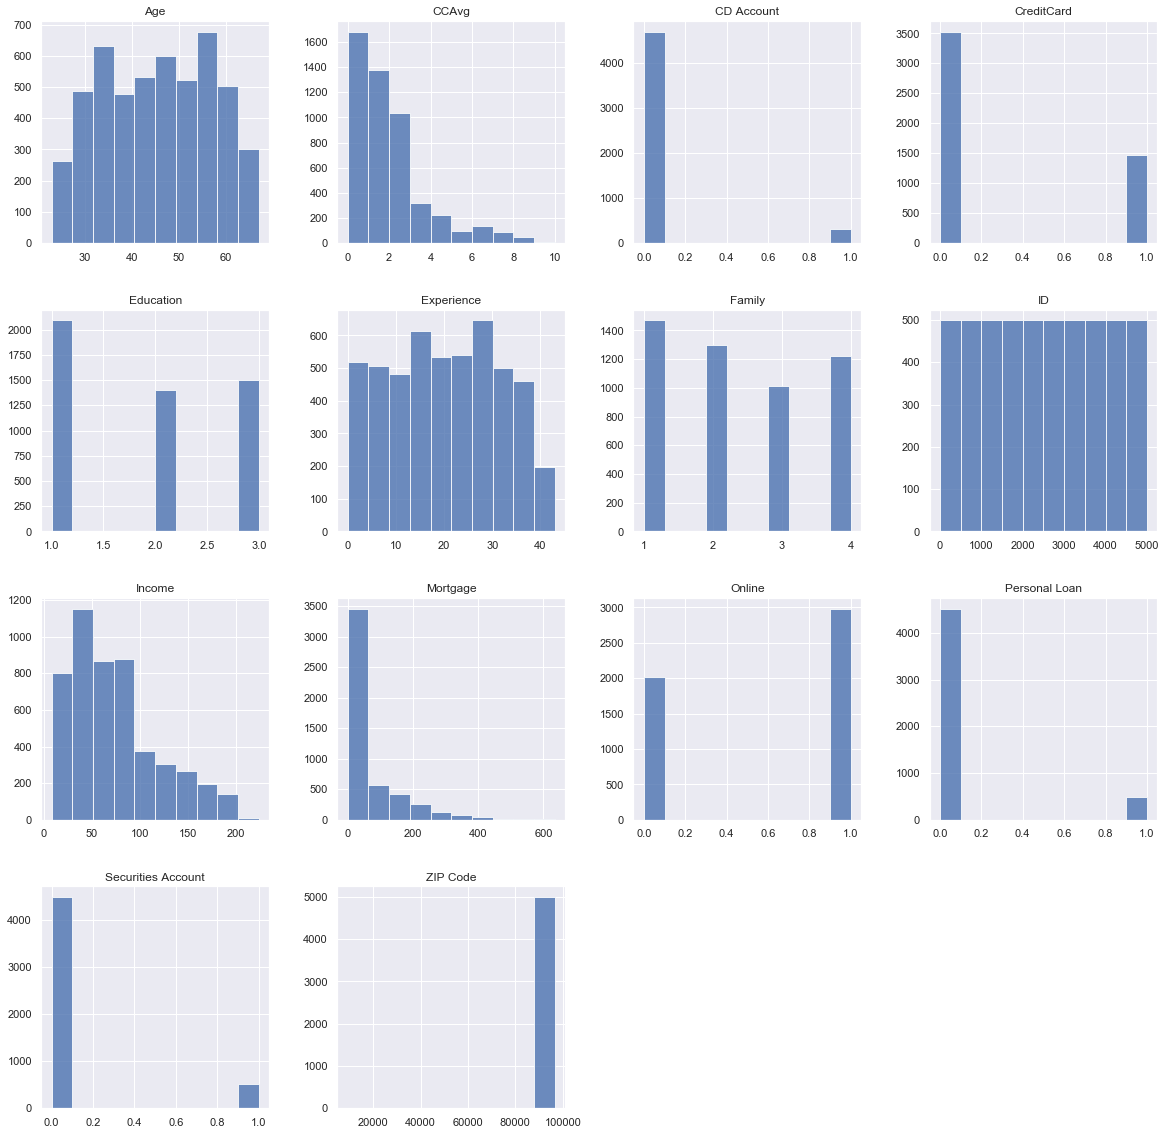

In [110]:
# Plotting histograms for all columns using histplot including the target variable also.

histograms=pdata.hist(figsize=(20,20),alpha=0.80) # alpha for adjusting the level of transparency.

# Can try with bins
#pdata.hist(bins = 100, figsize=(20,15));

In [111]:
#Plotting a correlation matrix
pdata.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008265,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994198,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008265,0.994198,1.000000,-0.046729,-0.028783,-0.052213,-0.049912,0.013536,-0.010840,-0.007858,-0.001111,0.010046,0.013975,0.008910
Income,-0.017695,-0.055269,-0.046729,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028783,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052213,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.049912,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013536,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010840,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007858,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


Output Indicates that :
    
There is a strong positive correlation between Age and Experience(Indicates that one of these columns can be dropped if needed).       
There is a 0.5 positive correlation exists between Personal Loan Acceptance and Income.     
There is a 0.6 positive correlation between Income and Average spending on credit card per month.     
There is a 0.3 positive correleation betwen Personal Loan and Average credit card spending.      
There is a 0.2 positive correlation between Income and Mortgage.        
There is a 0.3 positive correlation betwen Personal Loan and CD Account.        
There is a 0.3 positive correlation between CD Account and Securities Account.         
There is a 0.28 positive correlation between CD Account and CreditCard

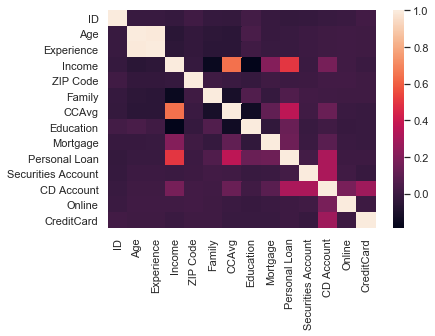

In [112]:
#plotting correlation graph 

sns.heatmap(pdata.corr())

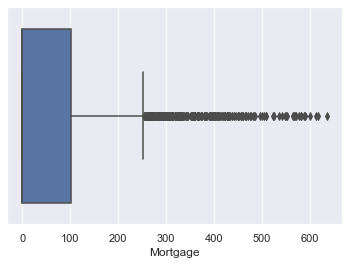

In [113]:
#Trying a boxplot for Mortgage

sns.boxplot(x='Mortgage',data=pdata)

Output indicates the presence of outliers. We confirmed earlier that majority of the customers
are with zero Mortgage.  Hence, this can be explained.      
Also, from the above correlation matrix, we already found that there is a positive correlation exists between Income and Mortgage.  Hence the presence of high Income customers explains this variation.

#### Bivariate analysis:

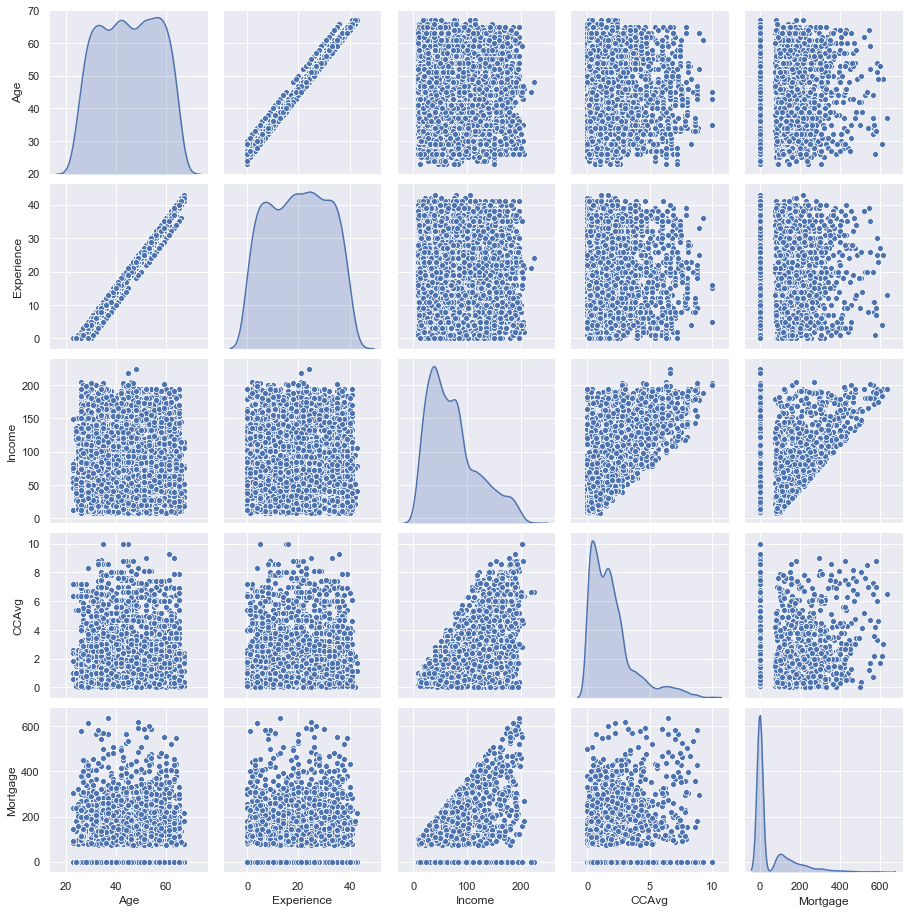

In [114]:
#Plotting the pairplot of continuous variables (removing the categorical fields)

colss=['ID','ZIP Code','Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']
continuous_pairplot = pdata.drop(colss, axis=1)

sns.pairplot(continuous_pairplot,diag_kind='kde') # with 'kde' on for continuous variables

Plots show a strong positive correlation between Age and Experience

In [115]:
#Just doing a correlation again for the continuous variables
continuous_pairplot.corr()

,Age,Experience,Income,CCAvg,Mortgage
Age,1.000000,0.994198,-0.055269,-0.052012,-0.012539
Experience,0.994198,1.000000,-0.046729,-0.049912,-0.010840
Income,-0.055269,-0.046729,1.000000,0.645984,0.206806
CCAvg,-0.052012,-0.049912,0.645984,1.000000,0.109905
Mortgage,-0.012539,-0.010840,0.206806,0.109905,1.000000


,ID,ZIP Code,Family,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,91107,4,1,0,1,0,0,0
1,2,90089,3,1,0,1,0,0,0
2,3,94720,1,1,0,0,0,0,0
3,4,94112,1,2,0,0,0,0,0
4,5,91330,4,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
4995,4996,92697,1,3,0,0,0,1,0
4996,4997,92037,4,1,0,0,0,1,0
4997,4998,93023,2,3,0,0,0,0,0
4998,4999,90034,3,2,0,0,0,1,0


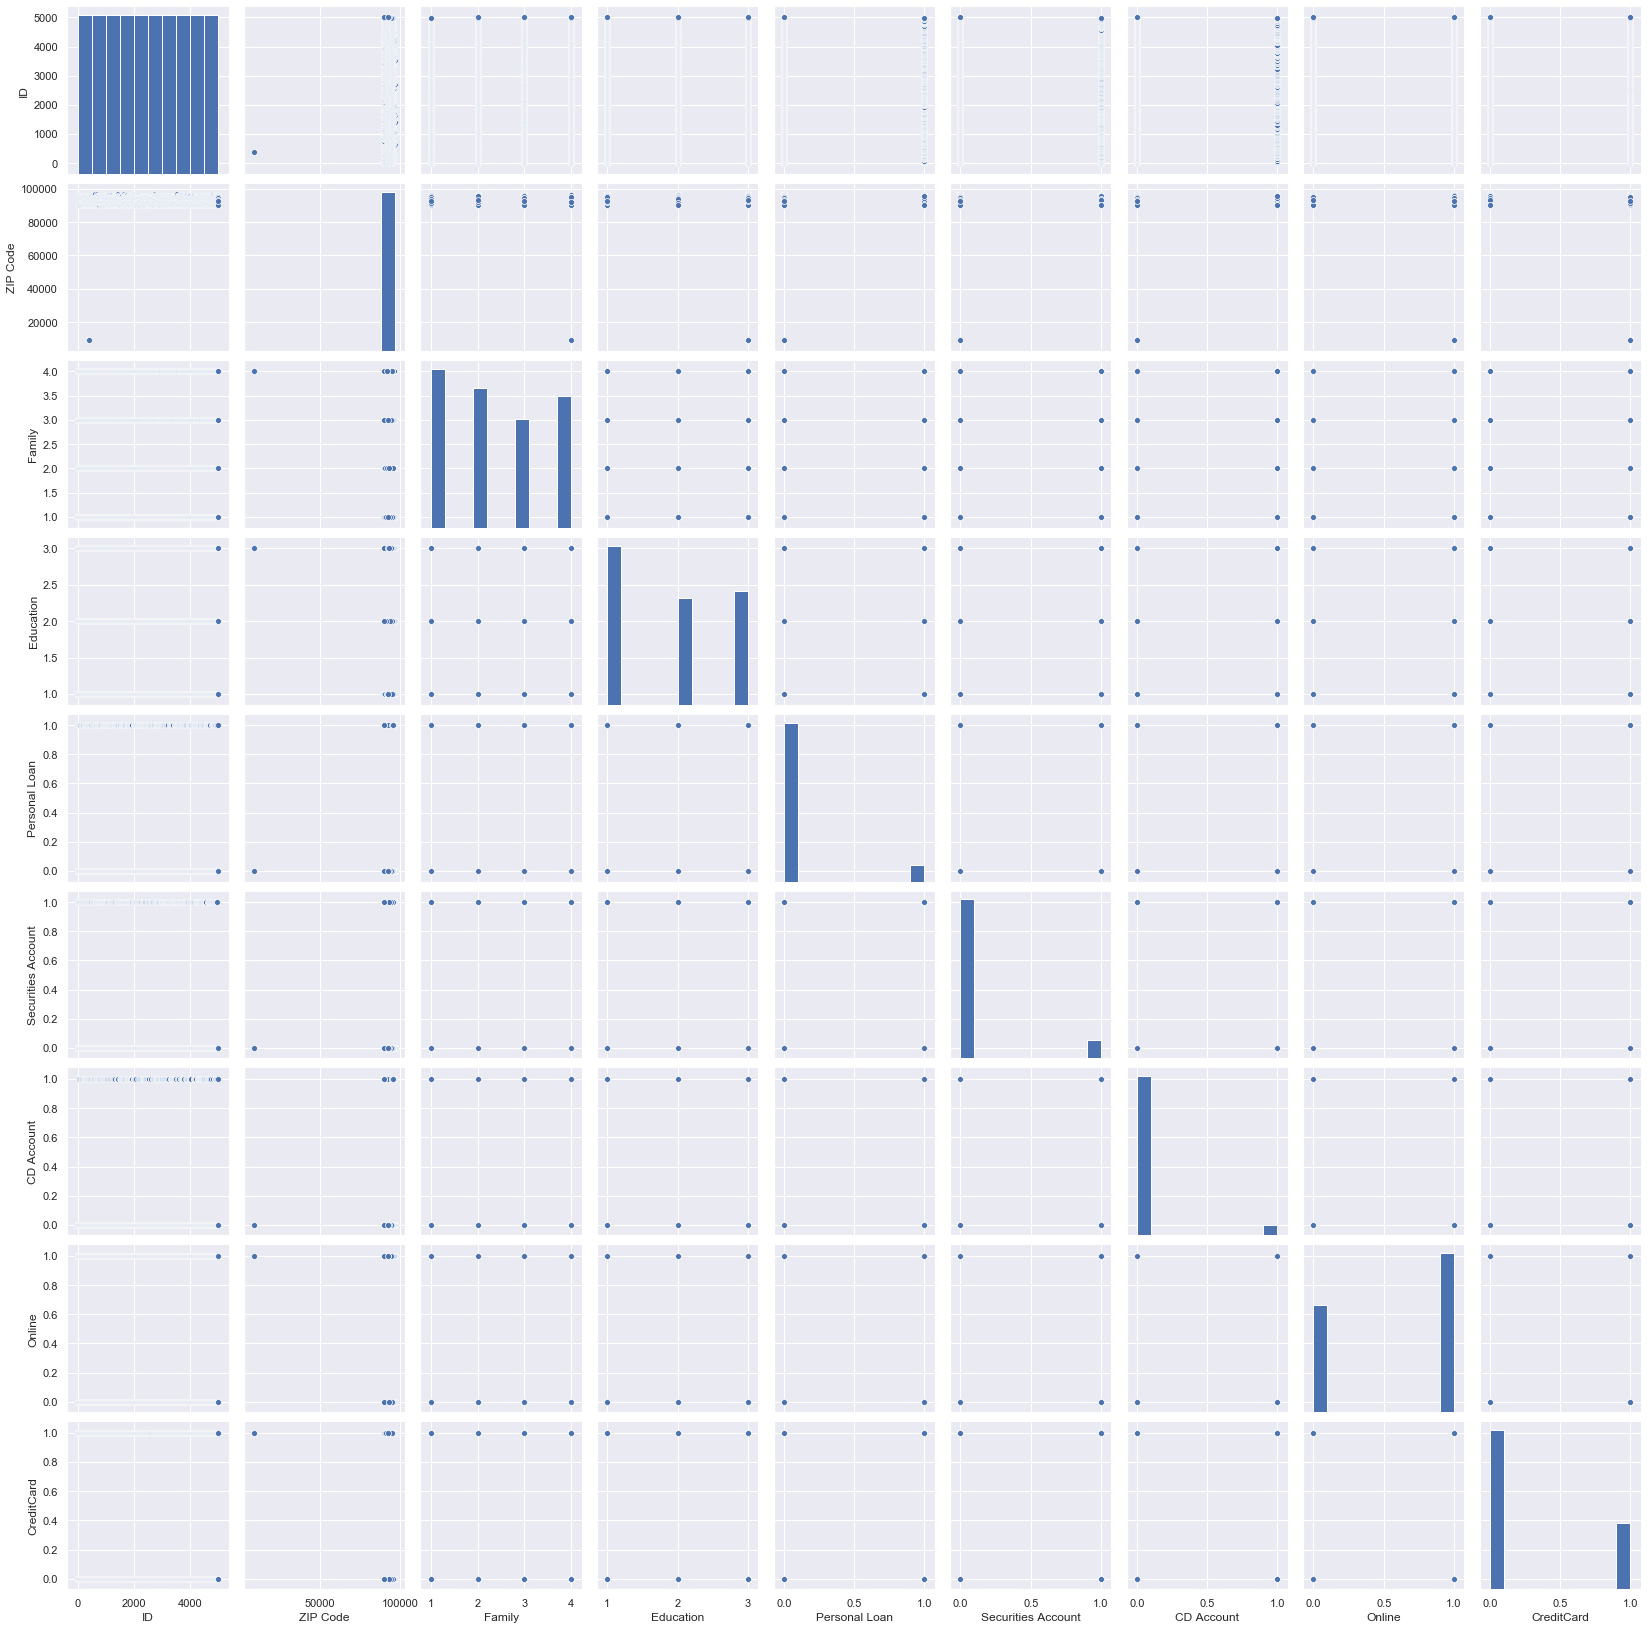

In [116]:
#Pairplot for the categorical variables

#colss=['ID','ZIP Code','Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']
categorical_pairplot = pdata[colss]
display(categorical_pairplot)

sns.pairplot(categorical_pairplot) # with 'kde' off for categorical variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E6C0649348>]],
      dtype=object)

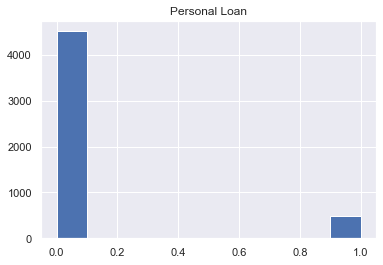

In [117]:
#Target variable distribution:
#sns.distplot(pdata['Personal Loan'])
pdata.hist('Personal Loan')

In [118]:
#Calculating the target variable True/False ratio

n_true = len(pdata.loc[pdata['Personal Loan'] == 1])
n_false = len(pdata.loc[pdata['Personal Loan'] == 0])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 480 (9.60%)
Number of false cases: 4520 (90.40%)


Before getting the model bulit, we did these checks:
Outliers,  Missing values/zeros/incorrect imputations,  Skewness

Now converting all the categorical columns to datatype "category"

In [119]:
#Categorical conversion ----This is doing for the purpose of One Hot Encoding later

pdata['Personal Loan'] = pdata['Personal Loan'].astype('category')
pdata['Securities Account'] = pdata['Securities Account'].astype('category')
pdata['CD Account'] = pdata['CD Account'].astype('category')
pdata['Online'] = pdata['Online'].astype('category')
pdata['CreditCard'] = pdata['CreditCard'].astype('category')
pdata['Education'] = pdata['Education'].astype('category')

#Currently, I am not taking the 'Family' column for One Hot Encoding. Will come back if necessary once the model is built.
pdata.info()
#Output indicates these variables's datatypes are now category.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIP Code            5000 non-null   int64   
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal Loan       5000 non-null   category
 10  Securities Account  5000 non-null   category
 11  CD Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(6), float64(1), int64(7)
memory usage: 342.5 KB


#### CLASSIFICATION MODEL CREATION

In [120]:
#First Define independent variables (X) and dependent (Y) variable.
#Making the ADS - Analytical Dataset

#pdata.head()

X = pdata.drop(['ID','ZIP Code','Personal Loan'], axis=1)  #dropping ID and ZIP code as these are unimportant
Y = pdata[['Personal Loan']]   #target variable 

display(X.head())
display(Y.head())

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


,Personal Loan
0,0
1,0
2,0
3,0
4,0


#### One Hot Encoding for the Categorical Variables :

In [121]:
# One Hot Encoding -- before splitting the data into train and test 
#Convert categorical variables to dummy variables 
#Those with datatype 'category'(or object) only get hot encoded (no integers) in my understanding. 
#Since we already converted them into categorical variables, this will work now:

X = pd.get_dummies(X, drop_first=True)  #dropping the first columns of each hot encoded variables as their values can assume from the other.
display(X.shape)
display(X.head())
X.info()    #just to see the datatypes of hot encoded columns -- uint

(5000, 12)

,Age,Experience,Income,Family,CCAvg,Mortgage,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1
0,25,1,49,4,1.6,0,0,0,1,0,0,0
1,45,19,34,3,1.5,0,0,0,1,0,0,0
2,39,15,11,1,1.0,0,0,0,0,0,0,0
3,35,9,100,1,2.7,0,1,0,0,0,0,0
4,35,8,45,4,1.0,0,1,0,0,0,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   5000 non-null   int64  
 1   Experience            5000 non-null   int64  
 2   Income                5000 non-null   int64  
 3   Family                5000 non-null   int64  
 4   CCAvg                 5000 non-null   float64
 5   Mortgage              5000 non-null   int64  
 6   Education_2           5000 non-null   uint8  
 7   Education_3           5000 non-null   uint8  
 8   Securities Account_1  5000 non-null   uint8  
 9   CD Account_1          5000 non-null   uint8  
 10  Online_1              5000 non-null   uint8  
 11  CreditCard_1          5000 non-null   uint8  
dtypes: float64(1), int64(5), uint8(6)
memory usage: 263.8 KB


Now Splitting the data into train and test

In [122]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

In [123]:
display(X_train.shape) #to see the 0.30 test size split (30% test size)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

print("{0:0.2f}% of the whole data is in the training dataset".format((len(X_train)/len(pdata))*100))
print("{0:0.2f}% of the whole data is in the test dataset".format((len(X_test)/len(pdata))*100))

(3500, 12)

(1500, 12)

(3500, 1)

(1500, 1)

70.00% of the whole data is in the training dataset
30.00% of the whole data is in the test dataset


In [124]:
#Cross checking the ratios:

n_true1 = len(pdata.loc[pdata['Personal Loan'] == 1])
n_false1 = len(pdata.loc[pdata['Personal Loan'] == 0])

n_true2 = len(y_train.loc[y_train['Personal Loan'] == 1])
n_false2 = len(y_train.loc[y_train['Personal Loan'] == 0])

n_true3 = len(y_test.loc[y_test['Personal Loan'] == 1])
n_false3 = len(y_test.loc[y_test['Personal Loan'] == 0])


print("Number of customers who accepted Personal Loan in whole dataset (Actual(Observed) Positives from the whole dataset): {0} ({1:2.2f}%)".format(n_true1, (n_true1 / (n_true1 + n_false1)) * 100 ))
print("Number of customers who didn't accept (Actual Negatives): {0} ({1:2.2f}%)".format(n_false1, (n_false1 / (n_true1 + n_false1)) * 100 ))
print('')

print("Actual Positives in the Training dataset: {0} ({1:2.2f}%)".format(n_true2, (n_true2 / (n_true2 + n_false2)) * 100 ))
print("Actual Negatives in the Training dataset: {0} ({1:2.2f}%)".format(n_false2, (n_false2 / (n_true2 + n_false2)) * 100 ))
print('')

print("Actual Positives in the Test dataset: {0} ({1:2.2f}%)".format(n_true3, (n_true3 / (n_true3 + n_false3)) * 100 ))
print("Actual Negatives in the Test dataset: {0} ({1:2.2f}%)".format(n_false3, (n_false3 / (n_true3 + n_false3)) * 100 ))


Number of customers who accepted Personal Loan in whole dataset (Actual(Observed) Positives from the whole dataset): 480 (9.60%)
Number of customers who didn't accept (Actual Negatives): 4520 (90.40%)

Actual Positives in the Training dataset: 331 (9.46%)
Actual Negatives in the Training dataset: 3169 (90.54%)

Actual Positives in the Test dataset: 149 (9.93%)
Actual Negatives in the Test dataset: 1351 (90.07%)


### Building model using Logistic Regression from SkLearn

In [125]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42);

#Fit the model with training data
logreg.fit(X_train, y_train);

coef_df = pd.DataFrame(logreg.coef_)
coef_df['intercept'] = logreg.intercept_
print(coef_df)

          0         1        2         3         4         5         6  \
0 -0.444802  0.442855  0.05145  0.541456  0.192314  0.000854  3.426188   

          7         8         9        10        11  intercept  
0  3.521387 -0.261068  2.711881 -0.591627 -0.824894  -0.456429  


In [126]:
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [127]:
y_train_predict = logreg.predict(X_train)             #model-predicted y_train values
y_train_predict_prob = logreg.predict_proba(X_train)  #to get probability values

print(y_train_predict)
print('')
print(y_train_predict_prob)


[0 0 0 ... 0 0 0]

[[9.99885782e-01 1.14217901e-04]
 [9.95466687e-01 4.53331290e-03]
 [9.90089404e-01 9.91059626e-03]
 ...
 [9.99967845e-01 3.21548790e-05]
 [7.90156691e-01 2.09843309e-01]
 [9.91175812e-01 8.82418756e-03]]


In [128]:
confusion_matrix(y_train,y_train_predict)

array([[3137,   32],
       [ 115,  216]], dtype=int64)

NB: Just to mention, when I created the model before the Experience column treatment and dropping of ID and ZIP code, the matrix was as below:
array([[3072,   97],
        [ 224,  107]]


In [129]:
#function to get confusion matrix in a proper format

def draw_cm( actual, predicted):
    cm = confusion_matrix(actual, predicted)
    print(cm)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()


[[3137   32]
 [ 115  216]]


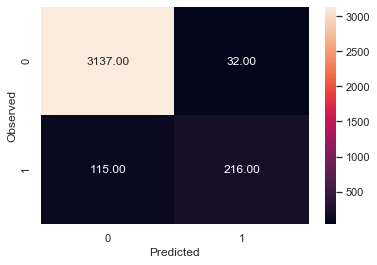

In [130]:
draw_cm(y_train,y_train_predict)

My Observations are as follows:

The output indicates that out of the total Positives (331) in the train set, the model predicted 216 truely.            

True Positive TP here = 216    (predicted positive, and they are actually positive)              
True Negative TN      = 3137   (predicted negative, and they are actually negative)                   
False Positive FP     = 32     (predicted positive, but they are actually negative)   Type I error                 
False Negative FN     = 115    (predicted negative, but they are actually positive)   Type II error


NB: TP and FN together makes the Actual positive count (Persoanl-Loan-accepted-customers count)in the training dataset            
ie, 115 + 216 = 331 (which we confirmed from the above ratio codes output)             
Similarly TN and FP together makes the count of those who didn't accept            
ie, 3137 + 32 = 3169 customers who didn't accept

The sum of all the columns of the cm is equal to the number of records of X train (3500)

We can calculate the TPR and TNR using the below equations too:

TPR (Sensitivity) (Recall) = TP/(TP + FN)          
Here, 216/(216 + 115) = 0.653      

TNR (Specificity) = TN/(TN + FP)        
Here 3137/(3137 + 32) = 0.9899        

Accuracy = (TP + TN)/(TP + TN + FP + FN)
(216 + 3137)/(216 + 3137 + 32 + 115) = 0.958


Classification Error Rate = (FP + FN)/(TP + FP +FN + TN)          
(32 + 115)/3500 = 0.042         

Precision = TP/(TP + FP)
216/(216 + 32) = 0.8709


Printing all the Evaluation Metrices below:

Training accuracy 0.958

Testing accuracy 0.9506666666666667

Confusion Matrix
[[3137   32]
 [ 115  216]]


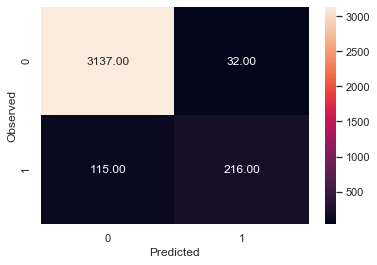

None

Recall: 0.6525679758308157

Precision: 0.8709677419354839

F1 Score: 0.7461139896373057

Log Loss: 1.4506359191913254

Roc Auc Score: 0.8212350765869131


In [131]:
#-----------------------------------Regression Score of the Training data--------------------------------------
print("Training accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()

score_default_train = logreg.score(X_train,y_train)
score_default_test = logreg.score(X_test,y_test)

print('Confusion Matrix')
print(draw_cm(y_train,y_train_predict))
print()

print("Recall:",recall_score(y_train,y_train_predict))
print()

print("Precision:",precision_score(y_train,y_train_predict))
print()

print("F1 Score:",f1_score(y_train,y_train_predict))
print()

print("Log Loss:",log_loss(y_train,y_train_predict))
print()

print("Roc Auc Score:",roc_auc_score(y_train,y_train_predict))

NB, Just to mention, before Experience column treatment, the accuracy obtained I am making a note here : 

Training accuracy 0.9082857142857143        
Testing accuracy 0.908

The new output got :


Training accuracy 0.958               
Testing accuracy 0.9506666666666667


Confusion Matrix
[[3137   32]
 [ 115  216]]        
 None         
 Recall: 0.6525679758308157          
 Precision: 0.8709677419354839         
 F1 Score: 0.7461139896373057         
 Log Loss: 1.4506359191913254         
 Roc Auc Score: 0.8221145366889782      
 
****************************************************************************
From comparing above, we can say that when the incorrect imputations are removed and some of the unimportant columns dropped, we got a better score for every parameters.        

Now need to run the created model on the test data to see the different outputs and after that we will try with solvers, penalty and other parameters

##### Applying the model on the test data

[0 0 0 ... 0 0 0]

[[9.78624106e-01 2.13758941e-02]
 [9.99696827e-01 3.03172707e-04]
 [9.99636328e-01 3.63672429e-04]
 ...
 [9.96650510e-01 3.34948998e-03]
 [9.82938980e-01 1.70610201e-02]
 [9.99422695e-01 5.77304751e-04]]
[[1338   13]
 [  61   88]]


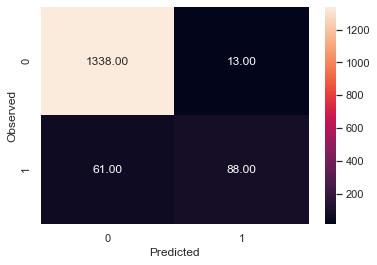

None


In [132]:
#** First getting the confusion matrix ***

y_test_predict = logreg.predict(X_test)             #predicting the y_test
y_test_predict_prob = logreg.predict_proba(X_test)  #to get probability values

print(y_test_predict)
print('')
print(y_test_predict_prob)

print(draw_cm(y_test,y_test_predict))

Got the below confusion matrix                
[[1338   13]
 [  61   88]]               
 
 Indicates that when i applied this model to predict the y_test from X_test, I am getting 88 TP (people accepting Personal Loan), where as actual is (88 + 61) = 149 (can also confirm from the ratio)       
 Actual Positives in the Test dataset: 149 (9.93%)             
 
 ie, Out of the total Positives (149) in the test set, the model predicted 88 truely.               
 
 True Positive TP here = 88    (predicted positive, and they are actually positive)            
 True Negative TN      = 1338   (predicted negative, and they are actually negative)              
 False Positive FP     = 13     (predicted positive, but they are actually negative) Type I error          
 False Negative FN     = 61    (predicted negative, but they are actually positive)  Type II error         
 
 TPR (Sensitivity) (Recall) = TP/(TP + FN)     
 Here, 88/(88 + 61) = 0.5906          
 TNR (Specificity) = TN/(TN + FP)         
 Here 1338/(1338 + 13) = 0.9904         
 Accuracy = (TP + TN)/(TP + TN + FP + FN)         
 (88 + 1338)/(88 + 1338 + 13 + 61) = 0.9507        
 Classification Error Rate = (FP + FN)/(TP + FP +FN + TN)        
 (13 + 61)/3500 = 0.0211       
 Precision = TP/(TP + FP)       
 88/(88 + 13) = 0.8713

Training accuracy 0.958

Testing accuracy 0.9506666666666667

Confusion Matrix
[[1338   13]
 [  61   88]]


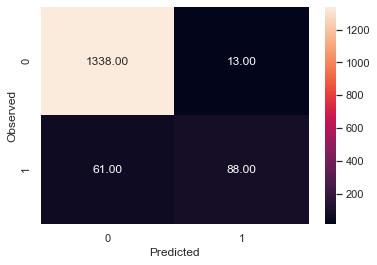

None

Recall: 0.5906040268456376

Precision: 0.8712871287128713

F1 Score: 0.7040000000000001

Log Loss: 1.7039198986599895

Roc Auc Score: 0.7904907624975783


In [133]:
#-----------------------------------Regression Score of the Test data--------------------------------------
print("Training accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()

print('Confusion Matrix')
print(draw_cm(y_test,y_test_predict))
print()

print("Recall:",recall_score(y_test,y_test_predict))
print()

print("Precision:",precision_score(y_test,y_test_predict))
print()

print("F1 Score:",f1_score(y_test,y_test_predict))
print()

print("Log Loss:",log_loss(y_test,y_test_predict))
print()

print("Roc Auc Score:",roc_auc_score(y_test,y_test_predict))

Question:  Use Logistic Regression model to predict the number of a customers buying personal loans. 
So If we go with this model, we can say from the above matrix that:      

Out of 30% of the total data given (ie, from the random picked test data),
88 customers may accept Personal Loan according to my model.

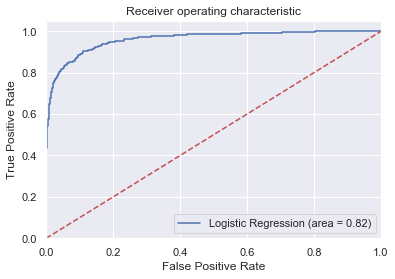

In [134]:
#AUC ROC curve of the training set

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc_train = roc_auc_score(y_train, logreg.predict(X_train))

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])

plt.figure()

plt.plot(fpr_train, tpr_train, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [135]:
#printing the cutoffs
print(thresholds_train)

[1.99934590e+00 9.99345897e-01 9.82463249e-01 9.82142763e-01
 8.69445021e-01 8.60263894e-01 8.34833416e-01 8.31298295e-01
 8.12881331e-01 7.96846823e-01 7.61531630e-01 7.60575506e-01
 7.56241573e-01 7.52275370e-01 7.48433096e-01 7.44188776e-01
 7.35319146e-01 7.32438283e-01 7.14977674e-01 6.98862293e-01
 6.78716245e-01 6.78114760e-01 6.76659599e-01 6.76497040e-01
 6.70185060e-01 6.65001837e-01 6.54840771e-01 6.51161570e-01
 6.40841388e-01 6.40387238e-01 6.35239483e-01 6.23125384e-01
 6.16759706e-01 6.12501817e-01 5.73452899e-01 5.70710764e-01
 5.67950487e-01 5.64044808e-01 5.62808351e-01 5.61463992e-01
 5.59152414e-01 5.58112798e-01 5.34543715e-01 5.28442233e-01
 5.28046976e-01 5.21652751e-01 5.15584513e-01 5.15248862e-01
 5.10921382e-01 5.05446368e-01 4.95710299e-01 4.77048848e-01
 4.70296121e-01 4.67692442e-01 4.64184414e-01 4.55955078e-01
 4.54478520e-01 4.51848389e-01 4.36171162e-01 4.34570981e-01
 4.21863176e-01 4.03991540e-01 4.02247109e-01 4.01107427e-01
 3.96557937e-01 3.874534

In [136]:
fpr_train, tpr_train, thresholds_train =roc_curve(y_train, logreg.predict_proba(X_train)[:,1])

FPR_train=pd.DataFrame(fpr_train)
FPR_train.rename(columns = {0:'False Positive Rate'}, inplace = True)


TPR_train=pd.DataFrame(tpr_train)
TPR_train.rename(columns = {0:'True Positive Rate'}, inplace = True)

THRESHOLD_train=pd.DataFrame(thresholds_train)
THRESHOLD_train.rename(columns = {0:'Threshold'}, inplace = True)

result_train = pd.concat([FPR_train, TPR_train, THRESHOLD_train], axis=1, sort=False)

result_train.head(10)

,False Positive Rate,True Positive Rate,Threshold
0,0.000000,0.000000,1.999346
1,0.000000,0.003021,0.999346
2,0.000000,0.123867,0.982463
3,0.000316,0.123867,0.982143
4,0.000316,0.401813,0.869445
5,0.000631,0.401813,0.860264
6,0.000631,0.435045,0.834833
7,0.000947,0.435045,0.831298
8,0.000947,0.453172,0.812881
9,0.001262,0.453172,0.796847


,fpr_train,tpr_train,1-fpr_train,tf_train,thresholds_train
0,0.000000,0.000000,1.000000,-1.000000,1.999346
1,0.000000,0.003021,1.000000,-0.996979,0.999346
2,0.000000,0.123867,1.000000,-0.876133,0.982463
3,0.000316,0.123867,0.999684,-0.875817,0.982143
4,0.000316,0.401813,0.999684,-0.597872,0.869445


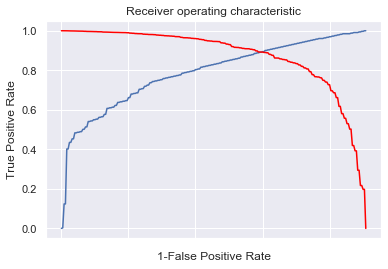

In [137]:
####################################
#Finding the optimal threshold ---
# The optimal cut off would be where tpr is high and fpr is low
####################################

import pylab as pl

i = np.arange(len(tpr_train)) # index for df
roc = pd.DataFrame({'fpr_train' : pd.Series(fpr_train, index=i),'tpr_train' : pd.Series(tpr_train, index = i), '1-fpr_train' : pd.Series(1-fpr_train, index = i), 'tf_train' : pd.Series(tpr_train - (1-fpr_train), index = i), 'thresholds_train' : pd.Series(thresholds_train, index = i)})
roc.iloc[(roc.tf_train-0).abs().argsort()[:1]]

# Plot tpr vs 1-fpr
fig, ax = pl.subplots()
pl.plot(roc['tpr_train'])
pl.plot(roc['1-fpr_train'], color = 'red')
pl.xlabel('1-False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')
ax.set_xticklabels([])

display(roc.head())

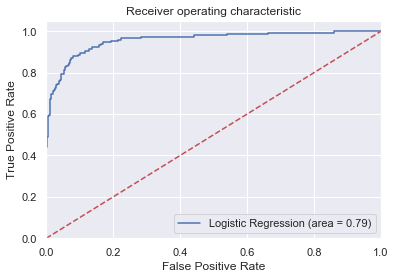

In [138]:
#AUC ROC curve of the test data set

logit_roc_auc_test = roc_auc_score(y_test, logreg.predict(X_test))

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.figure()

plt.plot(fpr_test, tpr_test, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [139]:
fpr_test, tpr_test, thresholds_test =roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

FPR_test=pd.DataFrame(fpr_test)
FPR_test.rename(columns = {0:'False Positive Rate'}, inplace = True)

TPR_test=pd.DataFrame(tpr_test)
TPR_test.rename(columns = {0:'True Positive Rate'}, inplace = True)

THRESHOLD_test=pd.DataFrame(thresholds_test)
THRESHOLD_test.rename(columns = {0:'Threshold'}, inplace = True)

result_test = pd.concat([FPR_test, TPR_test, THRESHOLD_test], axis=1, sort=False)
result_test.head(10)


,False Positive Rate,True Positive Rate,Threshold
0,0.000000,0.000000,1.997225
1,0.000000,0.006711,0.997225
2,0.000000,0.402685,0.825500
3,0.000740,0.402685,0.818578
4,0.000740,0.442953,0.768509
5,0.001480,0.442953,0.761246
6,0.001480,0.449664,0.760285
7,0.002221,0.449664,0.750839
8,0.002221,0.456376,0.735401
9,0.002961,0.456376,0.732849


,fpr_test,tpr_test,1-fpr_test,tf_test,thresholds_test
0,0.00000,0.000000,1.00000,-1.000000,1.997225
1,0.00000,0.006711,1.00000,-0.993289,0.997225
2,0.00000,0.402685,1.00000,-0.597315,0.825500
3,0.00074,0.402685,0.99926,-0.596575,0.818578
4,0.00074,0.442953,0.99926,-0.556307,0.768509


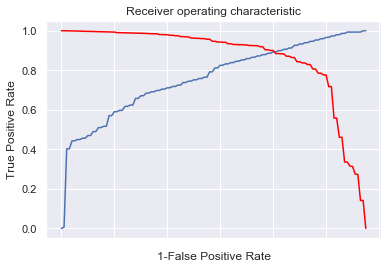

In [140]:
####################################
#Finding the optimal threshold ---
# The optimal cut off would be where tpr is high and fpr is low
####################################

import pylab as pl

ii = np.arange(len(tpr_test)) # index for df
rocc = pd.DataFrame({'fpr_test' : pd.Series(fpr_test, index=ii),'tpr_test' : pd.Series(tpr_test, index = ii), '1-fpr_test' : pd.Series(1-fpr_test, index = ii), 'tf_test' : pd.Series(tpr_test - (1-fpr_test), index = ii), 'thresholds_test' : pd.Series(thresholds_test, index = ii)})
rocc.iloc[(rocc.tf_test-0).abs().argsort()[:1]]

# Plot tpr vs 1-fpr
fig, ax = pl.subplots()
pl.plot(rocc['tpr_test'])
pl.plot(rocc['1-fpr_test'], color = 'red')
pl.xlabel('1-False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')
ax.set_xticklabels([])

display(rocc.head())

Now that the model is ready, next is Parameter checking to see how the model performs with different values of the arguments.

#### Checking Parameters of logistic regression model

In [141]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [142]:
#******TRYING DIFFERENT CASES**********
#***********CASE 1: ****************
# Running a loop to check different values of parameters and two types of solvers


#function to just print the default scores from above codes
def func0():
    print("Training accuracy (with default parameters while model creation)",score_default_train)
    print("Testing accuracy (with default parameters while model creation)",score_default_test)
    print('')

func0()

train_score=[]
test_score=[]

solver = ['newton-cg','lbfgs']

for i in solver:
    model1 = LogisticRegression(random_state=42, penalty='l2', C = 0.75,solver=i)  # changing values of solver
    
    model1.fit(X_train, y_train) 
    y_predict_test = model1.predict(X_test) 
    
    train_score.append(round(model1.score(X_train, y_train),3))
    test_score.append(round(model1.score(X_test, y_test),3))

def func1():
    print("CASE 1 :")
    print('****Case 1 with different solvers and C values')
    print("The different solvers used :", solver)
    print("Training scores for each solver: ", train_score)
    print("Test scores for each solver: ", test_score)
    print()

func1()

Training accuracy (with default parameters while model creation) 0.958
Testing accuracy (with default parameters while model creation) 0.9506666666666667

CASE 1 :
****Case 1 with different solvers and C values
The different solvers used : ['newton-cg', 'lbfgs']
Training scores for each solver:  [0.957, 0.957]
Test scores for each solver:  [0.958, 0.953]



From the output, my understanding is that, earlier with all default parameters train score was 0.958 and test score 0.9506.      
This time, for the C value of 0.75 (instead of default 1.0) and solver 'newton-cg' train score becomes 0.957 and test score is 0.958.        
Also, for the C value of 0.75 and default solver (lbfgs) , train score becomes 0.957 and test score is 0.953.        

ie, Although training accuracy decreased, test accuracy is improved a bit in both cases

In [143]:
#****************CASE 2 ***************************
#Now checking with default C and solver 'newton-cg'

#Printing the above case values first
func0()
func1()

model2 = LogisticRegression(random_state=42,penalty='l2',solver='newton-cg')  # as per above cell, newton-cg works better
# random_state=42 and penalty='l2' can be removed also, because by default, it takes those values


model2.fit(X_train, y_train)
score_case2_train = model2.score(X_train,y_train)
score_case2_test = model2.score(X_test, y_test)
y_predict_test = model2.predict(X_test)     

def func2():
    print("\nCASE 2 : ")
    print("Training accuracy with penalty l2 and newton-cg :", score_case2_train) 
    print("Testing accuracy with penalty l2 and newton-cg :", score_case2_test)
    print()

func2()

Training accuracy (with default parameters while model creation) 0.958
Testing accuracy (with default parameters while model creation) 0.9506666666666667

CASE 1 :
****Case 1 with different solvers and C values
The different solvers used : ['newton-cg', 'lbfgs']
Training scores for each solver:  [0.957, 0.957]
Test scores for each solver:  [0.958, 0.953]


CASE 2 : 
Training accuracy with penalty l2 and newton-cg : 0.9574285714285714
Testing accuracy with penalty l2 and newton-cg : 0.958



In [144]:
#********* CASE 3 ****************************
#Trying with solver - liblinear **********


#Printing above scores
func0()
func1()
func2()

model3 = LogisticRegression(penalty='l1',solver='liblinear')
model3.fit(X_train, y_train)
y_predict = model3.predict(X_test)     

def func3():
    print("\nCASE 3 : ")
    print("Training accuracy with penalty l1 and liblinear :", model3.score(X_train,y_train))
    print("Testing accuracy with penalty l1 and liblinear :", model3.score(X_test, y_test))
    print()
    
func3()

Training accuracy (with default parameters while model creation) 0.958
Testing accuracy (with default parameters while model creation) 0.9506666666666667

CASE 1 :
****Case 1 with different solvers and C values
The different solvers used : ['newton-cg', 'lbfgs']
Training scores for each solver:  [0.957, 0.957]
Test scores for each solver:  [0.958, 0.953]


CASE 2 : 
Training accuracy with penalty l2 and newton-cg : 0.9574285714285714
Testing accuracy with penalty l2 and newton-cg : 0.958


CASE 3 : 
Training accuracy with penalty l1 and liblinear : 0.9577142857142857
Testing accuracy with penalty l1 and liblinear : 0.9586666666666667



In [145]:
#*************CASE 4 :**********************
#****Checking with 'balanced class_weight and newton-cg solver**********

#printing above case values
func0()
func1()
func2()
func3()

model4 = LogisticRegression(random_state=42,penalty='l2',class_weight='balanced',solver='newton-cg') # changing class weight to balanced

model4.fit(X_train, y_train) 

y_predict = model4.predict(X_test)     

def func4():
    print("\nCASE 4: ")
    print("Training accuracy with 'balanced class_weight and newton-cg", model4.score(X_train,y_train))  
    print("Testing accuracy with 'balanced class_weight and newton-cg",model4.score(X_test, y_test))
func4()


Training accuracy (with default parameters while model creation) 0.958
Testing accuracy (with default parameters while model creation) 0.9506666666666667

CASE 1 :
****Case 1 with different solvers and C values
The different solvers used : ['newton-cg', 'lbfgs']
Training scores for each solver:  [0.957, 0.957]
Test scores for each solver:  [0.958, 0.953]


CASE 2 : 
Training accuracy with penalty l2 and newton-cg : 0.9574285714285714
Testing accuracy with penalty l2 and newton-cg : 0.958


CASE 3 : 
Training accuracy with penalty l1 and liblinear : 0.9577142857142857
Testing accuracy with penalty l1 and liblinear : 0.9586666666666667


CASE 4: 
Training accuracy with 'balanced class_weight and newton-cg 0.9082857142857143
Testing accuracy with 'balanced class_weight and newton-cg 0.91


In [146]:
#*******CASE 5****************
#Now Running a loop to check different values of 'C'


#printing above results
func0()
func1()
func2()
func3()
func4()

train_score1=[]                                 
test_score1=[]

C = [0.01,0.1,0.25,0.5,0.75,1]

for i in C:
    model5 = LogisticRegression(random_state=42,penalty='l2', class_weight='balanced', C=i, solver='newton-cg')# changing values of C
    model5.fit(X_train, y_train) 
    y_predict = model5.predict(X_test)     
    train_score1.append(round(model5.score(X_train,y_train),3)) 
    test_score1.append(round(model5.score(X_test, y_test),3))   

def func5():
    print("\nCASE 5 : ")
    print("List of different values of C :    \t", C)
    print("List of corresponding training accuracies:", train_score1)
    print("List of corresponding test accuracies : ", test_score1)

func5()


Training accuracy (with default parameters while model creation) 0.958
Testing accuracy (with default parameters while model creation) 0.9506666666666667

CASE 1 :
****Case 1 with different solvers and C values
The different solvers used : ['newton-cg', 'lbfgs']
Training scores for each solver:  [0.957, 0.957]
Test scores for each solver:  [0.958, 0.953]


CASE 2 : 
Training accuracy with penalty l2 and newton-cg : 0.9574285714285714
Testing accuracy with penalty l2 and newton-cg : 0.958


CASE 3 : 
Training accuracy with penalty l1 and liblinear : 0.9577142857142857
Testing accuracy with penalty l1 and liblinear : 0.9586666666666667


CASE 4: 
Training accuracy with 'balanced class_weight and newton-cg 0.9082857142857143
Testing accuracy with 'balanced class_weight and newton-cg 0.91

CASE 5 : 
List of different values of C :    	 [0.01, 0.1, 0.25, 0.5, 0.75, 1]
List of corresponding training accuracies: [0.886, 0.905, 0.905, 0.908, 0.909, 0.908]
List of corresponding test accuracies 

In [147]:
#********* CASE 6 ****************************
#default penalty l2 and liblinear

#Printing above scores
func0()
func1()
func2()
func3()
func4()
func5()

model6 = LogisticRegression(solver='liblinear')
model6.fit(X_train, y_train)
y_predict = model6.predict(X_test)     

def func6():
    print("\nCASE 6 : ")
    print("Training accuracy default penalty l2 and liblinear :", model6.score(X_train,y_train))
    print("Testing accuracy with default penalty l2 and liblinear :", model6.score(X_test, y_test))
    print()
    
func6()


Training accuracy (with default parameters while model creation) 0.958
Testing accuracy (with default parameters while model creation) 0.9506666666666667

CASE 1 :
****Case 1 with different solvers and C values
The different solvers used : ['newton-cg', 'lbfgs']
Training scores for each solver:  [0.957, 0.957]
Test scores for each solver:  [0.958, 0.953]


CASE 2 : 
Training accuracy with penalty l2 and newton-cg : 0.9574285714285714
Testing accuracy with penalty l2 and newton-cg : 0.958


CASE 3 : 
Training accuracy with penalty l1 and liblinear : 0.9577142857142857
Testing accuracy with penalty l1 and liblinear : 0.9586666666666667


CASE 4: 
Training accuracy with 'balanced class_weight and newton-cg 0.9082857142857143
Testing accuracy with 'balanced class_weight and newton-cg 0.91

CASE 5 : 
List of different values of C :    	 [0.01, 0.1, 0.25, 0.5, 0.75, 1]
List of corresponding training accuracies: [0.886, 0.905, 0.905, 0.908, 0.909, 0.908]
List of corresponding test accuracies 

In my understanding, we can go ahead with CASE 3 as it shows good training as well as test accuracy (95.77 and 95.87 resp).  CASE 2 can also be chosen as it also has a good score of 0.9574 and 0.958 resp.  Hence let us conclude that either liblinear or newton-cg solvers give the best output for this dataset.      


Now getting all the evaluation metrices for the final model :

#### Evaluation Metrices for the final model

Final Training accuracy 0.9577142857142857
Final Testing accuracy 0.9586666666666667

Confusion Matrix
[[3135   34]
 [ 114  217]]


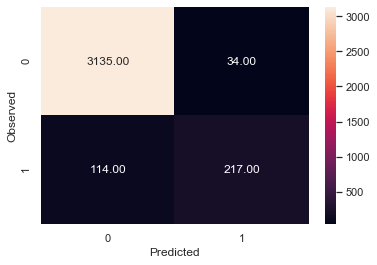

None

Recall: 0.6555891238670695

Precision: 0.8645418326693227

F1 Score: 0.7457044673539518

Log Loss: 1.46050459793126

Roc Auc Score: 0.8224300936470091


In [148]:

Final_model3 = LogisticRegression(penalty='l1',solver='liblinear')
Final_model3.fit(X_train, y_train)

y_train_predict_final = Final_model3.predict(X_train)

#-----------------------------------Regression Score of the Training data--------------------------------------

print("Final Training accuracy",Final_model3.score(X_train,y_train))  
print("Final Testing accuracy",Final_model3.score(X_test, y_test))
print()

print('Confusion Matrix')
print(draw_cm(y_train,y_train_predict_final))
print()

print("Recall:",recall_score(y_train,y_train_predict_final))
print()

print("Precision:",precision_score(y_train,y_train_predict_final))
print()

print("F1 Score:",f1_score(y_train,y_train_predict_final))
print()

print("Log Loss:",log_loss(y_train,y_train_predict_final))
print()

print("Roc Auc Score:",roc_auc_score(y_train,y_train_predict_final))



Final Training accuracy 0.9577142857142857

Final Testing accuracy 0.9586666666666667

Confusion Matrix
[[1341   10]
 [  52   97]]


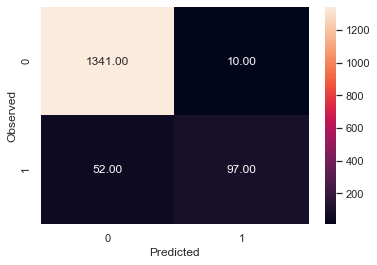

None

Recall: 0.6510067114093959

Precision: 0.9065420560747663

F1 Score: 0.7578125000000001

Log Loss: 1.427608088305844

Roc Auc Score: 0.8218023934545129


In [149]:
#-----------------------------------Regression Score of the Test data--------------------------------------

y_test_predict_final = Final_model3.predict(X_test)

print("Final Training accuracy",Final_model3.score(X_train,y_train))  
print()
print("Final Testing accuracy",Final_model3.score(X_test, y_test))
print()

print('Confusion Matrix')
print(draw_cm(y_test,y_test_predict_final))
print()

print("Recall:",recall_score(y_test,y_test_predict_final))
print()

print("Precision:",precision_score(y_test,y_test_predict_final))
print()

print("F1 Score:",f1_score(y_test,y_test_predict_final))
print()

print("Log Loss:",log_loss(y_test,y_test_predict_final))
print()

print("Roc Auc Score:",roc_auc_score(y_test,y_test_predict_final))

*******Final Logistic Model Performance*****************               


Confusion Matrix
[[1341   10]
 [  52   97]]                
 
 
 Hence I can say with my preferred model :           
 
 Out of the total Positives (149) in the test set, my model predicted 97 truely.          
 True Positive TP here = 97    (predicted positive, and they are actually positive)             
 True Negative TN      = 1341   (predicted negative, and they are actually negative)        
 False Positive FP     = 10     (predicted positive, but they are actually negative) Type I error            
 False Negative FN     = 52    (predicted negative, but they are actually positive)  Type II error       
 
We can see that the Type I and Type 2 errors are much reduced and our True Positives are more accurate in this model.

##### How performance can be improved?

As we have already seen, Age and Experience have a strong positive correlation.  Hence, dropping of one of those columns before model creation may enhance the performance of the model.

#### Business understanding

1. According to our model prediction, only 97 people will accept the personal loan.  But actually 149 did accept in the last campaign.  ie, the actual result exceeds our expectation. It's good in my understanding.  Please clarify.           

2. From the ROC curve and table, we identify that if the model is built and customised on a low threshold value (lower cutoff value), that would have increased the TPR. Please give thoughts on this.       

3. If we could increase the ROC Area under the curve, we would get more TPs and low FPs.  Please give feedback on this.
